In [31]:
import  pandas  as  pd
import  numpy as  np                   # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt        # For plotting graphs



In [32]:
data = pd.read_csv(r'C:\Users\HP\Music\bank-full.csv',sep=';')
y = data['y']



In [33]:
y = y.replace(['yes','no'],(1,0))
import seaborn as sns

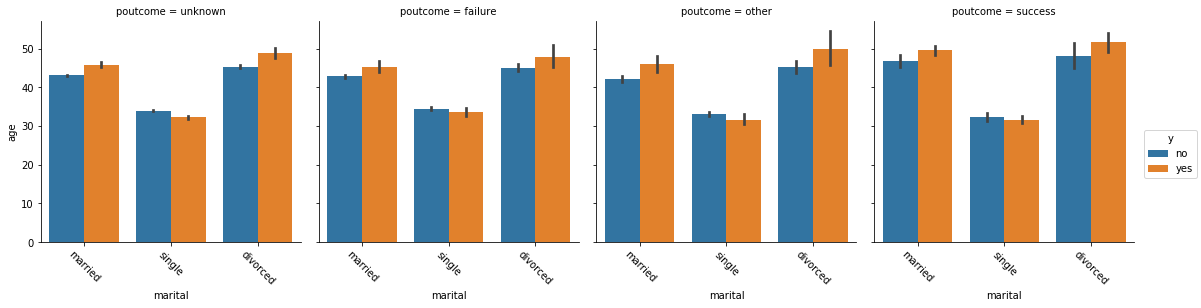

In [34]:
g = sns.factorplot(x='marital', 
                   y='age', 
                   data=data, 
                   hue='y',  
                   col='poutcome',
                  kind = 'bar')  # Separation by stage
                   
 
# Rotation of x-axis labels
g.set_xticklabels(rotation=-45)

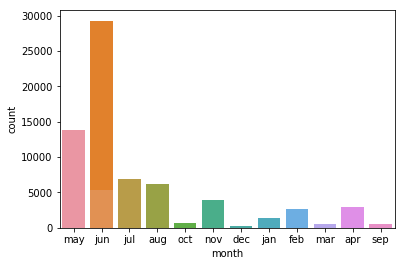

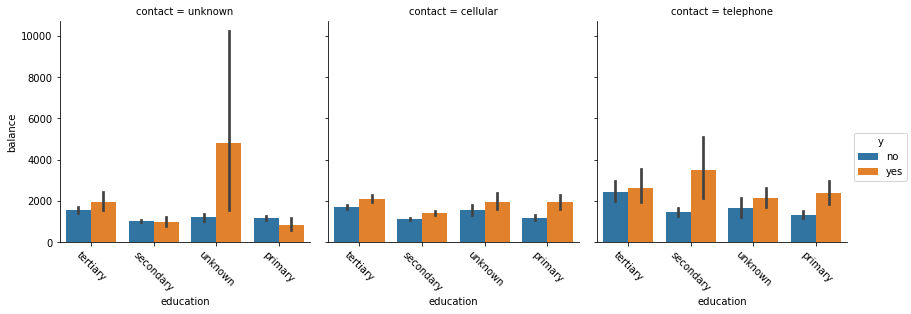

In [35]:
sns.countplot(x='contact', data=data)
sns.countplot(x='month', data=data)
# Factor Plot
g = sns.factorplot(x='education', 
                   y='balance', 
                   data=data, 
                   hue='y',  
                   col='contact',
                  kind = 'bar')  # Separation by stage
                   
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)

In [36]:
from sklearn import preprocessing

def encode_features(df_train):
    features = ['job','marital','default','education','housing','loan','contact','month','poutcome']
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_train[feature])
        df_train[feature] = le.transform(df_train[feature])
    return df_train


data = encode_features(data)
X = data.drop(['y'], axis = 1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators = 100, max_depth=10, random_state=13,criterion='gini')

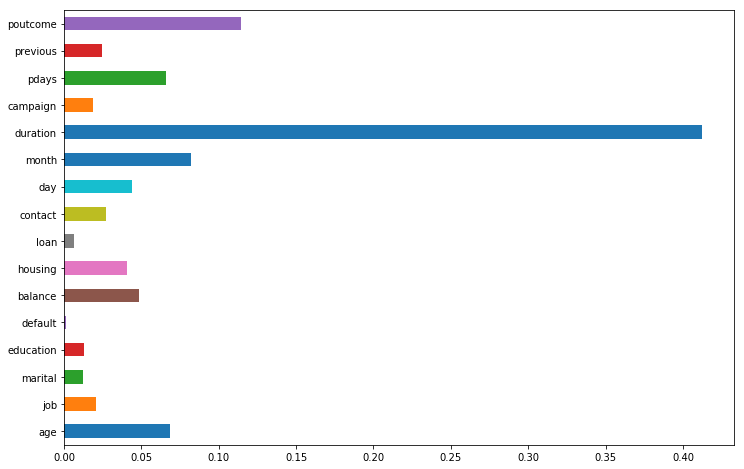

In [37]:
from sklearn import linear_model 
from sklearn.metrics import accuracy_score
ranfor.fit(X_train,y_train)
y_pred = ranfor.predict(X_test)
#
importances=pd.Series(ranfor.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,8))

In [38]:
accuracy_score(y_pred,y_test)

0.9077739688156585

In [40]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(5)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy_score(y_pred,y_test)

0.8780272033617162

In [47]:
#Now we will use test Data Set On Models We've Used
bank_random= pd.read_csv(r'C:\Users\HP\Music\bank.csv',sep=';')

y_random = bank_random['y']
y_random = y_random.replace(['yes','no'],(1,0))
X_random = bank_random.drop(['y'], axis = 1)
X_random = encode_features(X_random)
y_pred_knn = model.predict(X_random)
accuracy_score(y_pred_knn,y_random) #accuracy for KNN model

0.9059942490599425

In [48]:

y_pred_ranfor = ranfor.predict(X_random)#accuracy for Random Forest model
accuracy_score(y_pred_ranfor,y_random)

0.9267861092678611